In [1]:
                            import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv",sep=",", index_col="Id")
test=pd.read_csv("test.csv",sep=",", index_col="Id")

In [3]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
train.shape

(1460, 80)

In [5]:
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
#pip install missingno

#!conda install -c conda-forge folium


In [7]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.isnull().sum().sum()


6965

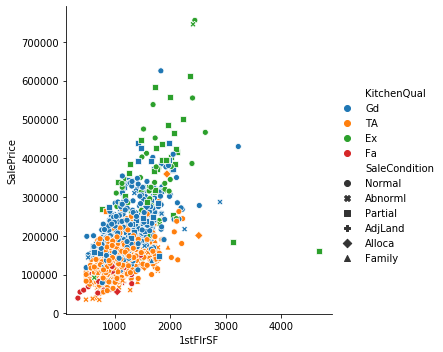

In [10]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="KitchenQual",style="SaleCondition", data=train)
# default for relplot is scatter
#y and x are variable in data
#hue, categorical or numeric variable in data that will produce different coluring
#style is a variable in the data that will produce diff styles

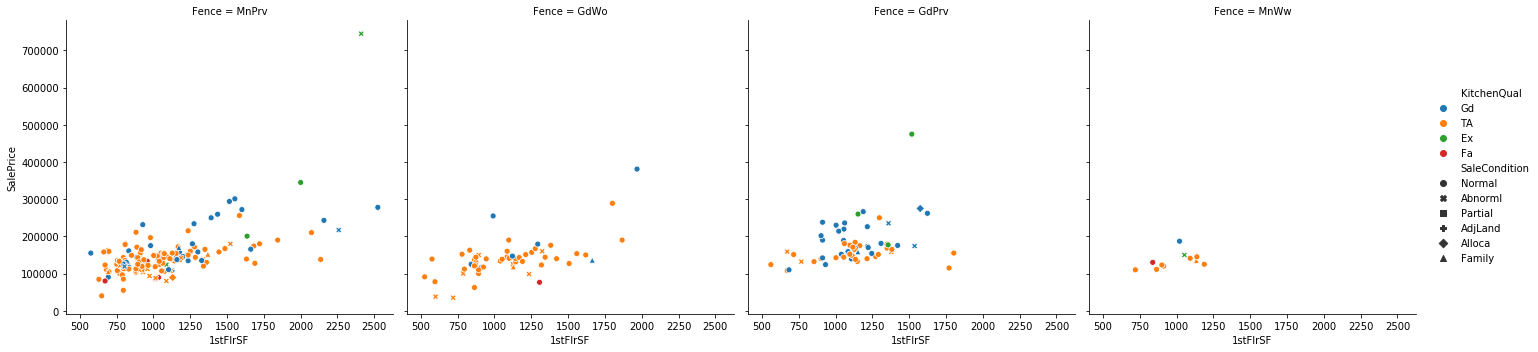

In [11]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="KitchenQual",style="SaleCondition", col="Fence", data=train)

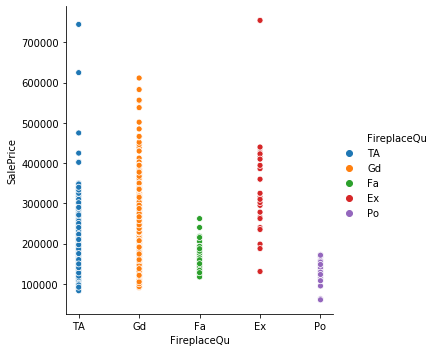

In [12]:
sns.relplot(y="SalePrice", hue="FireplaceQu",x="FireplaceQu", data=train)

In [13]:
#sns.relplot(y="SalePrice", x="1stFlrSF", hue="FireplaceQu",style="FireplaceQu", data=train)

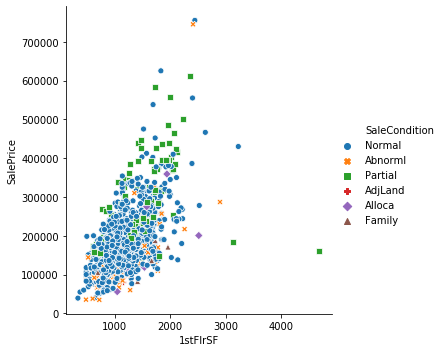

In [14]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="SaleCondition", style="SaleCondition", data=train)



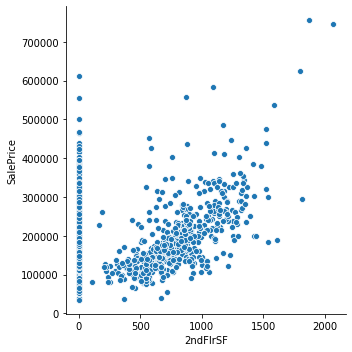

In [15]:
sns.relplot(y="SalePrice", x="2ndFlrSF", data=train)

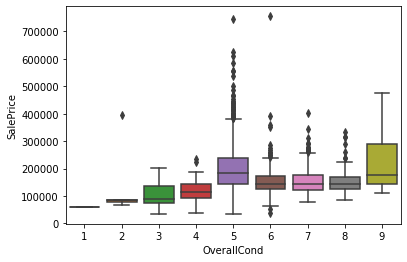

In [16]:
sns.boxplot(x=train.OverallCond, y=train.SalePrice)

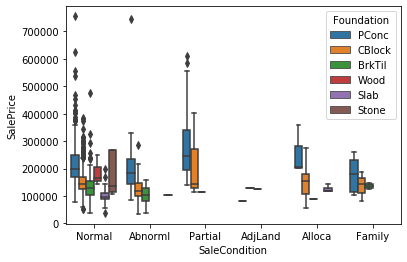

In [17]:
sns.boxplot(x=train.SaleCondition, y=train.SalePrice,hue=train.Foundation)

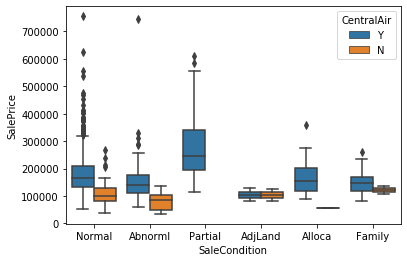

In [18]:
sns.boxplot(x=train.SaleCondition, y=train.SalePrice,hue=train.CentralAir)

In [19]:
k=open("file1",'a+')
k.read()
#k.write("hey buddy")
#k.close()
#k.read()

''

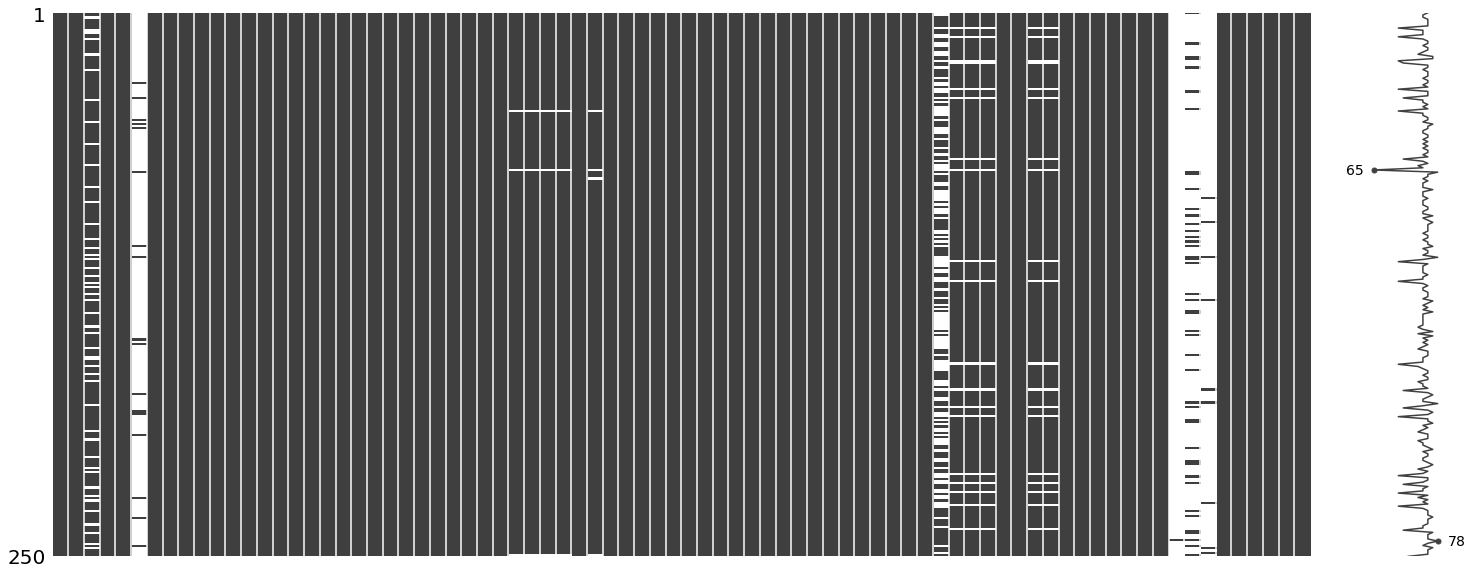

In [20]:
### Visualising missing data with package missing no
## using matrix 
import missingno as msn
%matplotlib inline
msn.matrix(train.sample(250))
#msn.matrix(train)



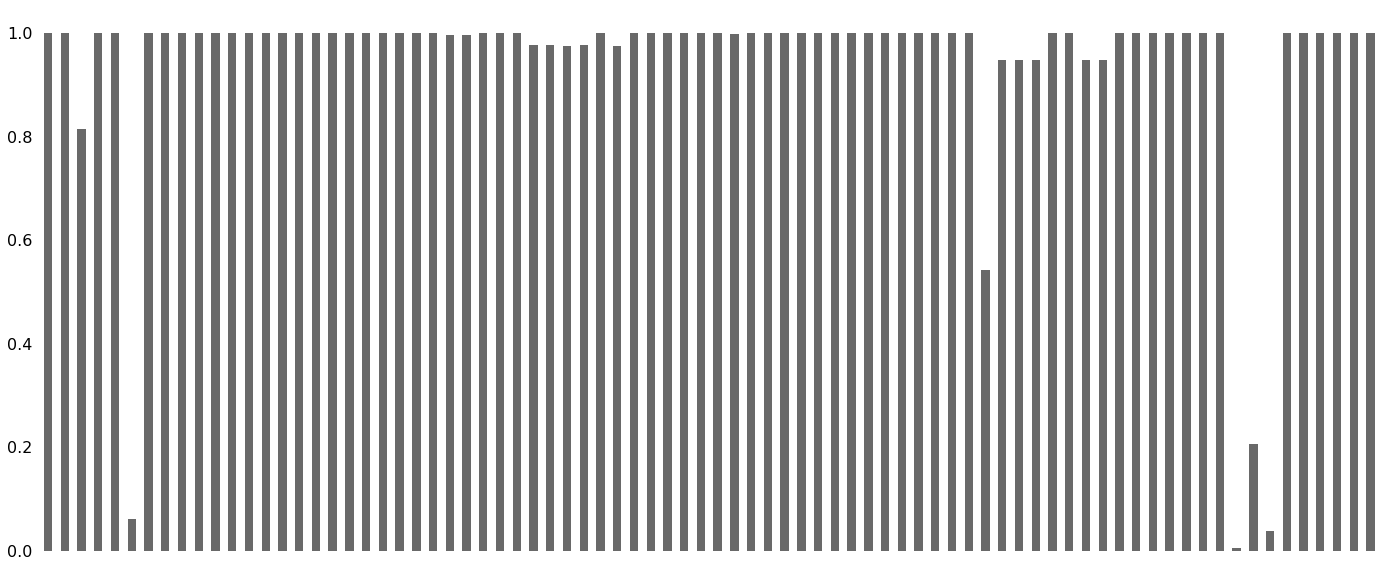

In [21]:
 msn.bar(train.sample(1000))

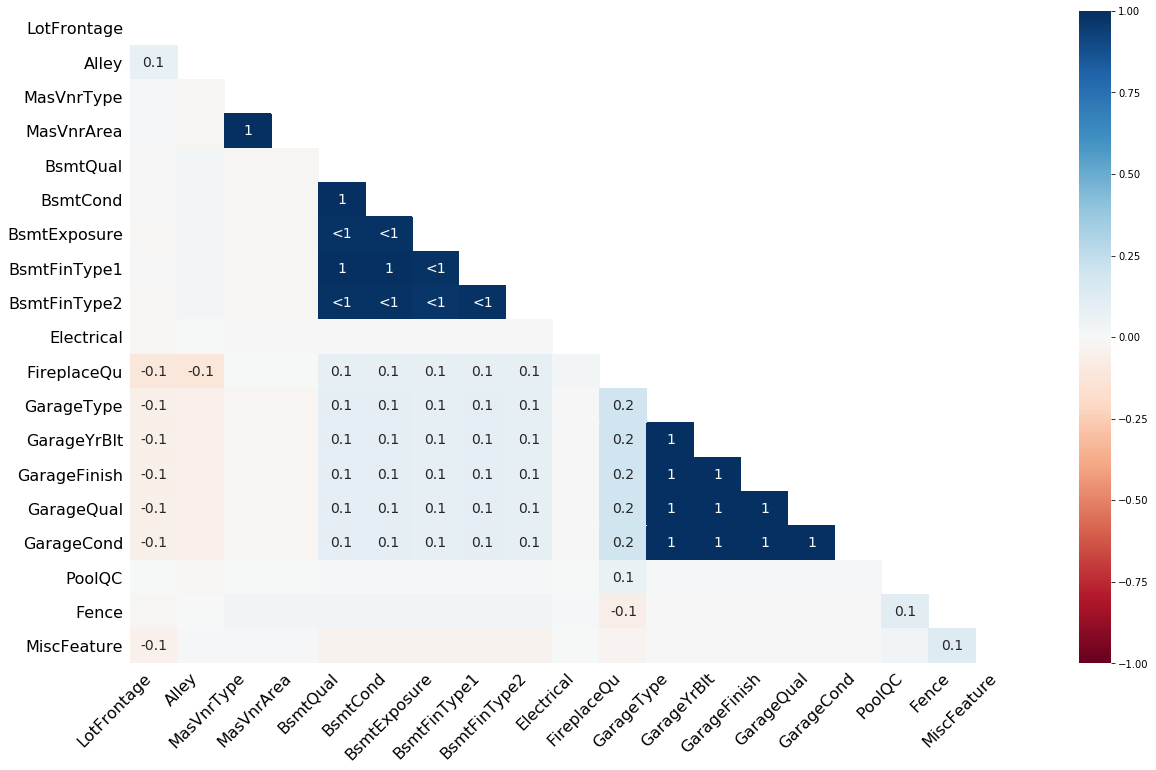

In [22]:
msn.heatmap(train) #measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

In [23]:
#msn.dendrogram(train)
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [119]:
names=[]
valuesper=[]
actual_values=[]
l=len(train)
for index,i in enumerate(train.isnull().sum()):
    if i>0:
        valuesper.append((i/l)*100)
        actual_values.append(i)
        names.append(train.columns[index])
valuesper.sort(reverse=True)
actual_values.sort(reverse=True)

d={"total missing":actual_values, "percentage missing":valuesper}
#pd.DataFrame(data=(valuesper),index=names,columns=["percentage of missing data"])
pd.DataFrame(data=d,index=names)

,total missing,percentage missing
LotFrontage,259,17.739726
MasVnrArea,81,5.547945
GarageYrBlt,8,0.547945


In [25]:
train.PoolQC.mode()

0    Gd
dtype: object

In [26]:
#df = pd.DataFrame([[np.nan, 2, np.nan, 0],
#...                    [3, 4, np.nan, 1],
#...                    [np.nan, np.nan, np.nan, 5],
#...                    [np.nan, 3, np.nan, 4]],
#...                   columns=list('ABCD'))
#df

In [100]:
#md=df.A.mode()
#type(md)

In [120]:

## dealing with missing data
# from the data description, some columns that have NA are not actually missing data
# the feature for that particular column is simply not present 

## We are going to fill these columns with none present features being represented as NA
cols_tofill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_tofill:
    train[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

def msg(df):
    names=[]
    valuesper=[]
    actual_values=[]
    l=len(train)
    for index,i in enumerate(df.isnull().sum()):
        if i>0:
            valuesper.append((i/l)*100)
            actual_values.append(i)
            names.append(train.columns[index])
    valuesper.sort(reverse=True)
    actual_values.sort(reverse=True)
    d={"total missing":actual_values, "percentage missing":valuesper}
#pd.DataFrame(data=(valuesper),index=names,columns=["percentage of missing data"])
    return(pd.DataFrame(data=d,index=names))

msg(train)


,total missing,percentage missing
LotFrontage,259,17.739726
MasVnrArea,81,5.547945
GarageYrBlt,8,0.547945


In [ ]:
msg(test)

In [121]:
# data imputation using regression
# first get the attributes that are categorical and those that are numerical

num_attr=train.dtypes[train.dtypes!=object]
cat_attr=train.dtypes[train.dtypes==object]
misng_num=set(num_attr.index)& set(names) # names variable has the attribute with missing data
misng_cat=set(cat_attr.index)& set(names)

print("Categorical attributes still missing data:", misng_cat, "\n")
print("Numerical attributes still missing data:", misng_num,"\n")


#set(names)

Categorical attributes still missing data: set() 

Numerical attributes still missing data: {'MasVnrArea', 'LotFrontage', 'GarageYrBlt'} 



In [122]:
## Looking for which other features correlate well with the numerical attributes still missing data


#sample=train[list(misng_num)]
#sample

#correlation=sample.corrwith(train,axis=1)
#ain.drop(misng_num,axis=1),axis=0)
#correlation.sample(40)
#correlation=sample.corrwith(train.drop(misng_num,axis=1),axis=0)

#r=np.corrcoef(sample.values,train.values)
#k=train.corr()
#sns.heatmap(k)



corr = train.corr()
corr_abs = corr.abs()
#type(corr)
#print(corr_abs)

def ser_corr(x):
    
    target = x

    ser_cor = corr_abs.nlargest(15,target)[target]

    return(ser_cor)


for i in misng_num:
    print(ser_corr(i),"\n", '%'*30)
    
    
    







MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
GarageCars      0.364204
TotalBsmtSF     0.363936
1stFlrSF        0.344501
YearBuilt       0.315707
TotRmsAbvGrd    0.280682
FullBath        0.276833
BsmtFinSF1      0.264736
GarageYrBlt     0.252691
Fireplaces      0.249070
HalfBath        0.201444
Name: MasVnrArea, dtype: float64 
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
MSSubClass      0.386347
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Fireplaces      0.266639
BedroomAbvGr    0.263170
OverallQual     0.251646
BsmtFinSF1      0.233633
PoolArea        0.206167
Name: LotFrontage, dtype: float64 
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
GarageYrBlt      1.000000
YearBuilt        0.825667
YearRemodAdd     0.642277
GarageCars       0.588920
GarageArea   

In [123]:
# creating a subset of data where there are not NAs
train1=train.dropna(axis=0)
fl=["1stFlrSF", "LotArea", "GrLivArea","TotalBsmtSF","MSSubClass","LotFrontage" ]
trainfl=train1[fl]

## finding total entries with Fl data mising
msngfl=train["LotFrontage"].isnull()
fl2=["1stFlrSF", "LotArea", "GrLivArea","TotalBsmtSF","MSSubClass" ]
msngfl2=pd.DataFrame(train[fl2][msngfl])


In [52]:
msngfl=train["LotFrontage"].isnull()
type(msngfl)
msngfl2=pd.DataFrame(train[fl2][msngfl])
msngfl2.shape
set(fl2) & set(num_attr.index)
#trainfl.sample(20)

,1stFlrSF,LotArea,GrLivArea,TotalBsmtSF,MSSubClass,LotFrontage
Id,,,,,,
895,1535,7018,1535,0,90,64.0
653,909,8750,1716,880,60,70.0
1159,1580,11932,1580,1580,20,92.0
1190,1028,7500,1804,994,60,60.0
1334,803,7200,1360,803,50,60.0
81,1182,13000,2142,896,60,100.0
118,1125,8536,1125,1125,20,74.0
564,1163,21780,1674,1163,50,66.0
441,2402,15431,2402,3094,20,105.0


In [125]:
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X=trainfl.drop("LotFrontage", axis=1).values
Y=trainfl["LotFrontage"].values

#Training data spliting 

#test_size = 0.4
#seed = 42
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed, shuffle=True)

#model training 

#model1 = LinearRegression()
#k=model1.fit(X_train, Y_train)

# predicting

#predicted = model1.predict(X_test)
#result1 = r2_score(Y_pred, Y_test)

# Results accuracy 

#print("Accuracy: ",  (result1*100.0))


kfold = KFold(n_splits=15, random_state=78,shuffle=True)
model = LinearRegression()
scoring = 'r2'
results1 = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results1.mean(), results1.std())

results2 = cross_val_score(model, X, Y, cv=kfold, scoring="neg_mean_absolute_error")
print(results2.mean(), results2.std())

model.fit(X,Y)

k=model.predict(msngfl2)


            






0.3478621755007119 0.13788961381923656
-12.649928203873484 1.8491635365766603


pandas.core.series.Series

In [171]:
### replacing the predicted values into the data frame

msng_index=train.LotFrontage[train["LotFrontage"].isnull()]
msng_index=msng_index.index

for i in msng_index:
    for v in k:
        train["LotFrontage"][i]=v
print(train["LotFrontage"].isnull().sum())
            
        

0


In [126]:
###  MasVnrArea


train1=train.dropna(axis=0)
mva1=["SalePrice", "GrLivArea","GarageArea","GarageCars","TotalBsmtSF", "MasVnrArea"]
trainmva=train1[mva1]

## finding total entries with mva data mising
msng_msa1=train["MasVnrArea"].isnull()
mva2=["SalePrice", "GrLivArea","GarageArea","GarageCars","TotalBsmtSF" ] 
msng_msa2=pd.DataFrame(train[mva2][msng_msa1])


X=trainmva.drop("MasVnrArea", axis=1).values
Y=trainmva["MasVnrArea"].values


kfold = KFold(n_splits=15, random_state=25,shuffle=True)
model = LinearRegression()
scoring = 'r2'
results1 = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results1.mean(), results1.std())

results2 = cross_val_score(model, X, Y, cv=kfold, scoring="neg_mean_absolute_error")
print(results2.mean(), results2.std())

model.fit(X,Y)

k2=model.predict(msng_msa2)
len(k2)

0.24486852851326155 0.14535359964643715
-107.66552577712982 15.703826873212115


8

In [132]:
## The regression imputation doesnot seem to be working for the rest 
## the other values are going to be replaced with the mean for those columns
for i in ("MasVnrArea","GarageYrBlt" ):
    train.fillna({i:train[i].mean()}, inplace = True)
    test.fillna({i:train[i].mean()}, inplace = True)
    print(train[i].isnull().sum())
    print(train[i].isnull().sum())


0
0
0
0
